In [ ]:
import os

import json
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataframes = []

def load_file(json_file_path):
  df = pd.DataFrame(
      json.load(open(json_file_path, "r")),
      columns = ["Type", "Trial", "Keycode", "Timestamp"]
    )
  
  # df["Keycode"] = df["Keycode"].astype(str)
  df["Keycode"] = df["Keycode"].apply(lambda code: chr(code) if code != 16 else "!")
  df = df[df["Keycode"] != "\r"]
  
  return df
  
path = "drive/MyDrive/Fish Type"
files = os.listdir(path)

# dataframes = [load_file(f"{path}/{f}") for f in files]
dataframes = []
for f in files:
  df = load_file(f"{path}/{f}")
  if chr(20) not in df.Keycode.ravel() and len(df) == 90*5:
    dataframes.append(df)

#For testing

len(dataframes)

df = dataframes[1]
df

,Type,Trial,Keycode,Timestamp
0,PRESS,1,!,1634433541692
1,PRESS,1,T,1634433541807
2,RELEASE,1,!,1634433541861
3,RELEASE,1,T,1634433541878
4,PRESS,1,H,1634433541903
...,...,...,...,...
449,RELEASE,5,D,1634433604249
450,PRESS,5,O,1634433604282
451,RELEASE,5,O,1634433604366
452,PRESS,5,G,1634433604395


#Generate Features



*   Duration - [TBD]
*   Seek - [TBD]



## Feature Example with Individual User

In [ ]:
def create_duration(df):
  press = df[df["Type"] == "PRESS"]["Timestamp"]
  release = df[df["Type"] == "RELEASE"]["Timestamp"]

  df_duration = df[df["Type"] == "PRESS"]

  duration = release.ravel() - press.ravel()
  df_duration["Duration"] = duration

  df_duration = df_duration.drop(columns = ["Type", "Timestamp"])

  return df_duration

duration = create_duration(df[df["Trial"] == 1])
duration

,Trial,Keycode,Duration
0,1,!,169
1,1,T,71
4,1,H,76
6,1,E,72
7,1,,80
10,1,Q,89
11,1,U,100
13,1,I,105
16,1,C,85
18,1,K,92


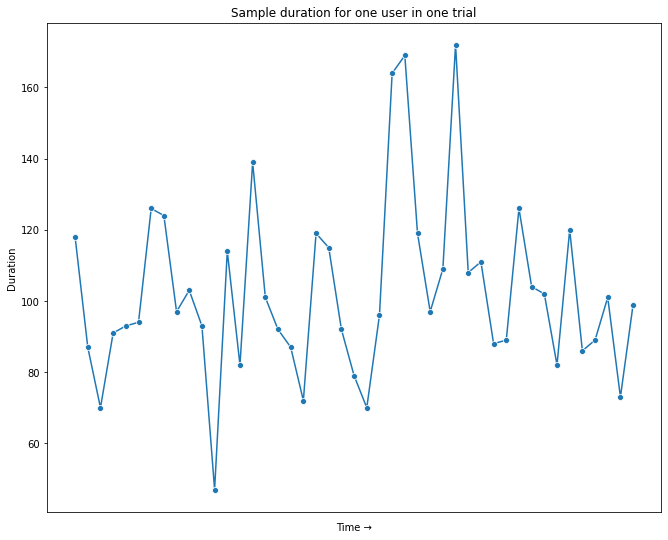

In [ ]:
# press = df[df["Type"] == "PRESS"]["Timestamp"]
# release = df[df["Type"] == "RELEASE"]["Timestamp"]
plt.figure(figsize=(11, 9))

duration = create_duration(df[df["Trial"] == 1])
# ax = sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration)
for trial in range(2, 6):
  duration = create_duration(df[df["Trial"] == trial])

ax = sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration)
ax.set_title("Sample duration for one user in one trial")
ax.set_xlabel("Time →")
ax.set(xticklabels = [])
ax.tick_params(bottom=False)

In [ ]:
#Calculate standard deviation for duration

# create_duration(df[df["Trial"] == 1]).drop(columns = "Trial").set_index("Keycode")

def calc_duration_cv(df):
  std = pd.concat([create_duration(df[df["Trial"] == trial]).drop(columns = "Trial").set_index("Keycode").T for trial in range(1, 6)]).std().ravel()
  mean = pd.concat([create_duration(df[df["Trial"] == trial]).drop(columns = "Trial").set_index("Keycode").T for trial in range(1, 6)]).mean()

  return std / mean
calc_duration_cv(df)

Keycode
!    0.124395
T    0.054299
H    0.027770
E    0.091643
     0.121743
Q    0.449351
U    0.224947
I    0.156059
C    0.192935
K    0.138701
     0.152315
B    0.231430
R    0.096728
O    0.155534
W    0.069588
N    0.161207
     0.114396
F    0.162419
O    0.079790
X    0.346862
     0.083136
J    0.193389
U    0.159535
M    0.112617
P    0.018182
E    0.201908
D    0.192764
     0.118106
O    0.088747
V    0.202640
E    0.081009
R    0.170140
     0.181416
T    0.220461
H    0.112124
E    0.222576
     0.040210
L    0.133154
A    0.175087
Z    0.086109
Y    0.057385
     0.148216
D    0.254588
O    0.103093
G    0.231778
dtype: float64

In [ ]:
def create_seek(df):
  press = df[df["Type"] == "PRESS"]["Timestamp"]
  release = df[df["Type"] == "RELEASE"]["Timestamp"]

  df_seek = df[df["Type"] == "RELEASE"][:-1]

  seek = release[1:].ravel() - press[:-1].ravel()
  df_seek["Seek"] = seek

  df_seek = df_seek.drop(columns = ["Type", "Timestamp"])

  df_seek.cols = list("!The quick brown fox jumped over the lazy dog".upper())

  return df_seek

<Figure size 1080x648 with 0 Axes>

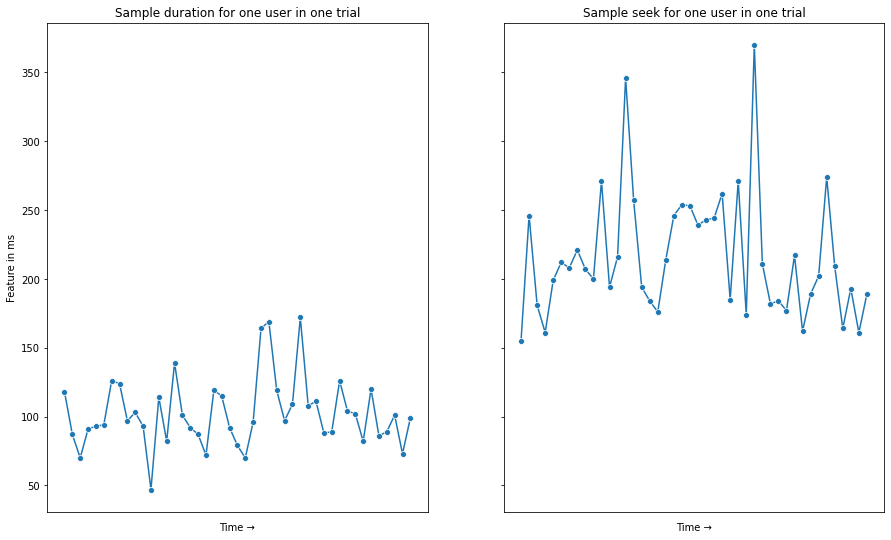

In [ ]:
plt.figure(figsize=(15, 9))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 9))

duration = create_duration(df[df["Trial"] == 1])
# ax = sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration)
for trial in range(2, 6):
  duration = create_duration(df[df["Trial"] == trial])

sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration, ax=ax1)
ax1.set_title("Sample duration for one user in one trial")
ax1.set_ylabel("Feature in ms")
ax1.set_xlabel("Time →")
ax1.set(xticklabels = [])
ax1.tick_params(bottom=False)

seek = create_seek(df[df["Trial"] == 1])
# ax = sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration)
for trial in range(2, 6):
  seek = create_seek(df[df["Trial"] == trial])

sns.lineplot(x=range(0, len(seek)), y="Seek", marker="o", data=seek, ax=ax2)
ax2.set_title("Sample seek for one user in one trial")
ax2.set_ylabel("Seek")
ax2.set_xlabel("Time →")
ax2.set(xticklabels = [])
ax2.tick_params(bottom=False)

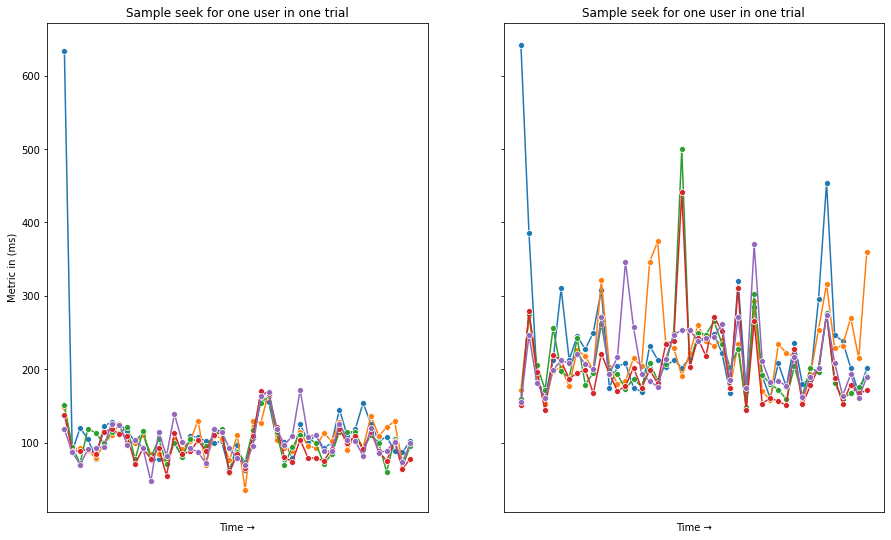

In [ ]:
# ax = sns.lineplot(x=range(len(seek)), y="Seek", marker="o", data=seek)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 9))

duration = create_duration(df[df["Trial"] == 1])
sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration, ax=ax1)
for trial in range(2, 6):
  duration = create_duration(df[df["Trial"] == trial])
  sns.lineplot(x=range(0, len(duration)), y="Duration", marker="o", data=duration, ax=ax1)
ax1.set_title("Sample duration for one user in all trials")
ax1.set_title("Sample seek for one user in one trial")
ax1.set_ylabel("Metric in (ms)")
ax1.set_xlabel("Time →")
ax1.set(xticklabels = [])
ax1.tick_params(bottom=False)

seek = create_seek(df[df["Trial"] == 1])
sns.lineplot(x=range(0, len(seek)), y="Seek", marker="o", data=seek, ax=ax2)
for trial in range(2, 6):
  seek = create_seek(df[df["Trial"] == trial])
  sns.lineplot(x=range(0, len(seek)), y="Seek", marker="o", data=seek, ax=ax2)
ax2.set_title("Sample seek for one user in all trials")
ax2.set_title("Sample seek for one user in one trial")
ax2.set_ylabel("Seek")
ax2.set_xlabel("Time →")
ax2.set(xticklabels = [])
ax2.tick_params(bottom=False)

Text(0.5, 1.0, 'Coeff of Variation of Seek')

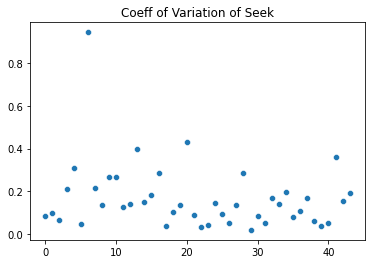

In [ ]:
#Calculate standard deviation for duration

def calc_seek_cv(df):

  std_list = []
  for trial in df["Trial"].unique():
    std_df = create_seek(df[df["Trial"] == trial]).drop(columns = "Trial").set_index("Keycode").T
    if std_df.columns.tolist() == ['!', 'T', 'H', 'E', ' ', 'Q', 'U', 'I', 'C', 'K', ' ', 'B', 'R', 'O', 'W', 'N', ' ', 'F', 'O', 'X', ' ', 'J', 'U', 'M', 'P', 'E', 'D', ' ', 'O', 'V', 'E', 'R', ' ', 'T', 'H', 'E', ' ', 'L', 'A', 'Z', 'Y', ' ', 'D', 'O']:
      std_list.append(std_df)

  std = pd.concat(std_list).std().ravel()
  mean = pd.concat(std_list).mean()

  return std / mean

seek_std = calc_seek_cv(df)
ax = sns.scatterplot(x = range(len(seek_std)), y = seek_std)
ax.set_title("Coeff of Variation of Seek")

## Feature Example with Multiple Users


In [ ]:
#Some housekeeping. Get rid of df's that are gonna cause me problems
for idx, df in enumerate(dataframes):
  try:
    create_duration(df)
  except:
    dataframes.pop(idx)

for idx, df in enumerate(dataframes):
  try:
    create_seek(df)
  except:
    dataframes.pop(idx)

len(dataframes)

41

## Variance across multiple users

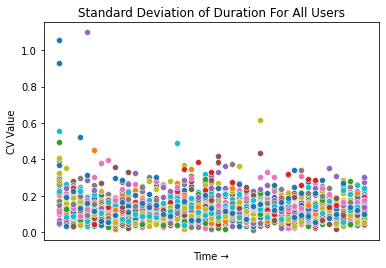

In [ ]:
#Calc std for duration
for idx, df in enumerate(dataframes):
  try:
    std_dev = (calc_duration_cv(df))
    ax = sns.scatterplot(x = range(len(std_dev)), y = std_dev)
  except:
    pass

ax.set_title("Standard Deviation of Duration For All Users")
ax.set_ylabel("CV Value")
ax.set_xlabel("Time →")
ax.set(xticklabels = [])
ax.tick_params(bottom=False)

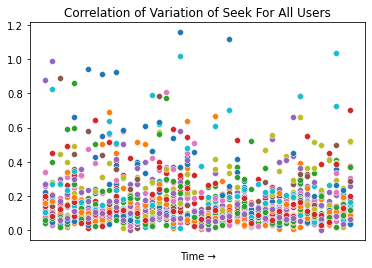

In [ ]:
#Calc std for seek
for idx, df in enumerate(dataframes):
  try:
    std_dev = (calc_seek_cv(df))
    ax = sns.scatterplot(x = range(len(std_dev)), y = std_dev)
  except:
    pass

ax.set_title("Correlation of Variation of Seek For All Users")
ax.set_xlabel("Time →")
ax.set(xticklabels = [])
ax.tick_params(bottom=False)

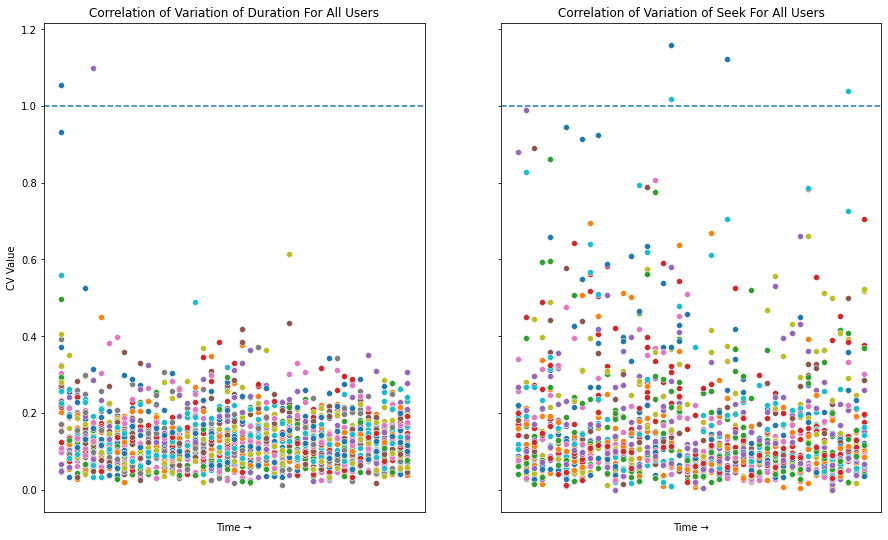

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 9))

for idx, df in enumerate(dataframes):
  try:
    std_dev = (calc_duration_cv(df))
    sns.scatterplot(x = range(len(std_dev)), y = std_dev, ax=ax1)
  except:
    pass

ax1.set_title("Correlation of Variation of Duration For All Users")
ax1.set_ylabel("CV Value")
ax1.set_xlabel("Time →")
ax1.set(xticklabels = [])
ax1.tick_params(bottom=False)
ax1.axhline(1, ls='--')

for idx, df in enumerate(dataframes):
  try:
    std_dev = (calc_seek_cv(df))
    sns.scatterplot(x = range(len(std_dev)), y = std_dev, ax=ax2)
  except:
    pass

ax2.set_title("Correlation of Variation of Seek For All Users")
ax2.set_xlabel("Time →")
ax2.set(xticklabels = [])
ax2.tick_params(bottom=False)
ax2.axhline(1, ls='--')


# Comparing Multiple Users With a Model

In [ ]:
def process_indiv_df(df):
  seek = create_seek(df)
  duration = create_duration(df)

  special_seek = seek.drop(columns = "Trial")
  special_seek["col"] = "SEEK_" + seek["Keycode"]
  identity = special_seek["Identity"].tolist()[0]
  special_seek = special_seek.drop(columns = ["Identity", "Keycode"]).set_index("col").T
  special_seek["Identity"] = identity
  special_seek = special_seek.reset_index().drop(columns = "index")



  special_duration = duration.drop(columns = "Trial")
  special_duration["col_0"] = "DURATION_" + duration["Keycode"]
  identity = special_duration["Identity"].tolist()[0]
  special_duration = special_duration.drop(columns = ["Identity", "Keycode"]).set_index("col_0").T
  special_duration = special_duration.reset_index().drop(columns = "index")

  return pd.concat([special_duration, special_seek], axis=1)

In [ ]:
dfs = []
for idx, df in enumerate(dataframes):
  #String to prevent any type of numerical regression
  df["Identity"] = str(idx)
  for trial in df["Trial"].unique():
    extract_df = process_indiv_df(df[df["Trial"] == trial])
    extract_df.columns = [str(i) for i in range(len(extract_df.columns) - 1)] + ["Identity"]
    dfs.append(extract_df)

print(len(dfs))
big_boy_df = pd.concat(dfs)

205


In [ ]:
big_boy_df= big_boy_df.reset_index().drop(columns = "index")

big_boy_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,Identity
0,311,117,99,75,87,100,124,121,76,108,95,111,67,115,76,108,104,84,116,95,77,160,108,139,109,148,126,108,100,48,119,105,91,71,91,83,75,124,84,150,...,256,208,329,233,330,631,203,221,342,268,220,272,242,309,223,466,310,348,252,295,223,223,232,170,279,172,197,193,151,202,157,262,224,354,231,218,958,207,225,0
1,280,139,96,89,127,55,127,124,47,112,83,112,88,127,91,100,84,47,107,60,59,88,85,123,140,131,113,95,95,88,159,104,108,79,79,72,80,104,89,144,...,195,215,228,303,431,307,277,289,992,443,218,580,238,467,215,300,240,308,248,259,184,204,214,551,338,195,232,230,156,187,143,233,200,371,284,232,627,203,189,0
2,277,128,106,92,100,95,112,116,60,99,95,111,101,120,88,79,92,59,119,60,104,133,117,125,128,146,144,91,106,64,140,102,88,77,108,92,88,104,92,124,...,250,192,518,255,506,387,242,272,646,283,276,741,254,279,231,464,331,332,245,266,231,270,218,143,326,175,199,206,152,231,198,349,355,344,245,219,484,263,220,0
3,299,145,119,97,104,92,102,116,40,145,96,120,80,97,107,108,112,60,119,93,83,96,120,107,155,128,128,108,107,75,151,102,90,70,76,101,132,115,68,136,...,228,188,179,273,219,302,234,237,241,272,431,753,243,284,224,268,265,358,227,251,217,298,234,176,343,199,191,202,136,237,330,401,279,334,246,168,605,224,198,0
4,238,168,99,100,87,97,105,126,39,138,79,77,72,72,105,107,97,47,124,59,96,97,112,109,146,116,147,83,108,84,138,119,96,77,92,81,72,106,104,149,...,243,192,164,264,201,256,192,194,205,245,218,520,224,231,203,279,260,308,215,256,217,311,241,185,337,210,270,197,169,185,162,235,222,368,192,174,470,216,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,634,88,120,105,78,122,128,125,116,101,114,76,77,76,99,81,109,107,102,99,102,62,97,63,106,157,155,105,101,79,125,101,110,92,100,145,109,118,154,126,...,310,213,245,227,250,308,174,204,208,175,169,232,213,203,213,202,215,240,239,248,222,168,320,170,285,191,160,208,176,236,180,187,295,454,247,238,202,167,201,40
201,149,92,92,89,79,97,111,125,99,99,110,85,84,72,103,91,102,130,69,111,105,76,110,36,130,127,169,103,93,88,115,95,93,113,102,128,90,112,93,136,...,202,177,226,218,198,321,203,180,184,215,204,346,374,236,229,191,222,260,238,232,240,175,235,147,293,170,158,234,222,217,155,193,254,316,229,232,270,215,360,40
202,151,94,72,119,113,99,114,113,121,77,116,79,105,71,100,80,105,102,96,109,119,58,87,74,117,154,164,114,70,94,111,107,99,71,84,115,115,114,90,111,...,198,188,242,179,195,262,199,193,173,187,176,209,185,207,249,500,203,250,247,265,235,203,228,149,302,192,180,172,159,204,164,202,196,276,181,160,167,176,191,40
203,138,89,89,90,85,115,118,112,109,71,92,78,92,55,113,84,88,103,89,110,114,60,85,66,109,170,166,121,80,74,104,79,79,75,91,118,100,109,91,115,...,211,187,195,199,167,221,194,170,177,202,174,199,181,234,239,441,203,242,218,271,252,175,311,144,265,153,161,156,151,227,152,178,202,274,188,153,179,167,171,40


In [ ]:
from sklearn.model_selection import train_test_split
X = big_boy_df.drop(columns=["Identity"]).reset_index().drop(columns = "index")
y = big_boy_df["Identity"].reset_index().drop(columns = "index")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=16, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
x_matrix = confusion_matrix(y_test, clf.predict(X_test))

FP = x_matrix.sum(axis=0) - np.diag(x_matrix)  
FN = x_matrix.sum(axis=1) - np.diag(x_matrix)
TP = np.diag(x_matrix)
TN = x_matrix.sum() - (FP + FN + TP)

# Taken from Stack Overflow
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FNR = FP/(FP+TN)
FPR = FN/(TP+FN)
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(f"Scikit Score: {clf.score(X_test, y_test)}")
print()

print(f"False Negative: {FNR.sum()}")
print(f"False Positive: {FPR.sum()}")



Scikit Score: 0.8823529411764706

False Negative: 0.11986857158059969
False Positive: nan
